#Theoratical


### 1. **Unsupervised learning**

It’s a type of machine learning where the model finds hidden patterns in unlabeled data. Clustering is a key technique used.

---

### 2. **How K-Means works**

It assigns each point to the nearest centroid, then updates centroids based on the average of assigned points until convergence.

---

### 3. **Dendrogram in Hierarchical Clustering**

A dendrogram is a tree-like diagram showing how clusters merge or split at each level of hierarchical clustering.

---

### 4. **K-Means vs. Hierarchical Clustering**

K-Means is flat and needs K in advance; hierarchical builds a tree structure and doesn’t require K.

---

### 5. **Advantages of DBSCAN over K-Means**

DBSCAN doesn’t need the number of clusters, handles noise, and works well with clusters of varying shapes and sizes.

---

### 6. **Use of Silhouette Score**

It evaluates how well each point fits its cluster. A higher score means better separation between clusters.

---

### 7. **Limitations of Hierarchical Clustering**

It’s computationally expensive, can't undo wrong merges, and is sensitive to noise and outliers.

---

### 8. **Importance of Feature Scaling**

Since clustering relies on distance, unscaled features may distort results. Scaling ensures fair contribution from all features.

---

### 9. **DBSCAN and Noise Points**

Points not having enough neighbors (MinPts) within the defined radius (ε) are marked as noise.

---

### 10. **Inertia in K-Means**

Inertia is the total squared distance from points to their cluster centroids. Lower inertia indicates better clustering.

---

### 11. **Elbow Method in K-Means**

It helps find the optimal K by plotting inertia vs. K and picking the point where the drop starts to level off.

---

### 12. **Density in DBSCAN**

A region is dense if a point has enough neighbors (MinPts) within a certain distance (ε), forming the basis of clusters.

---

### 13. **Hierarchical Clustering on Categorical Data**

Yes, it can be applied using special distance measures like Hamming distance suited for categorical features.

---

### 14. **Negative Silhouette Score**

It indicates the point might be in the wrong cluster as it is closer to another cluster than its own.

---

### 15. **Linkage Criteria in Hierarchical Clustering**

It defines how distances between clusters are calculated — options include single, complete, and average linkage.

---

### 16. **K-Means on Varying Sizes/Densities**

K-Means assumes equal-sized, spherical clusters, so it performs poorly on clusters with different shapes or densities.

---

### 17. **Core Parameters of DBSCAN**

ε defines the neighborhood radius, and MinPts is the minimum points required to form a dense cluster.

---

### 18. **K-Means++ Improvement**

K-Means++ selects initial centroids more strategically, reducing the chances of poor clustering and speeding up convergence.

---

### 19. **Agglomerative Clustering**

It’s a bottom-up approach where each data point starts in its own cluster and clusters merge step-by-step.

---

### 20. **Silhouette Score vs. Inertia**

Silhouette Score evaluates both cluster compactness and separation, while inertia only checks compactness.



#Practical

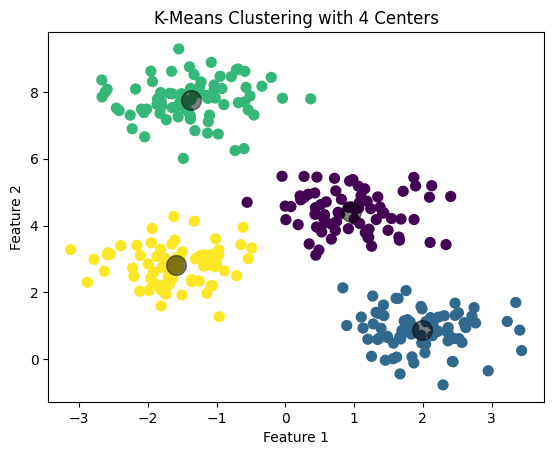

In [ ]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
# scatter plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# 22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
# predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

y_predicted = agg_clustering.labels_

print("First 10 predicted labels:", y_predicted[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


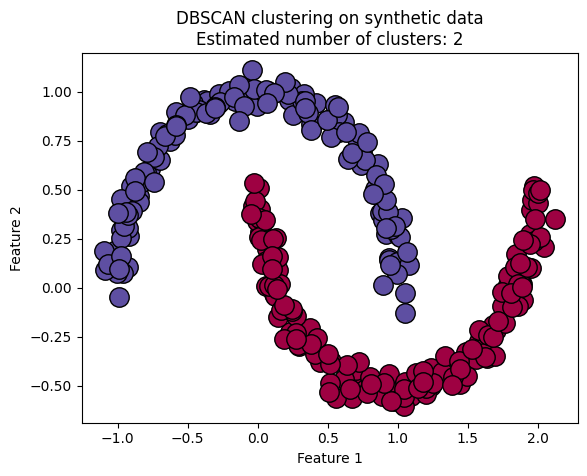

In [ ]:
# 23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

y_dbscan = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:

    col = [0, 0, 0, 1]

  class_member_mask = (labels == k)

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(
      xy[:, 0],
      xy[:, 1],
      "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=14,
  )

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
      xy[:, 0],
      xy[:, 1],
      "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=6,
  )

plt.title("DBSCAN clustering on synthetic data\nEstimated number of clusters: %d" % n_clusters_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# 24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
# cluster

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from collections import Counter

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

y_kmeans = kmeans.labels_

cluster_counts = Counter(y_kmeans)

print("Size of each cluster:")
for cluster_id, count in cluster_counts.items():
  print(f"Cluster {cluster_id}: {count}")


Size of each cluster:
Cluster 2: 62
Cluster 0: 65
Cluster 1: 51


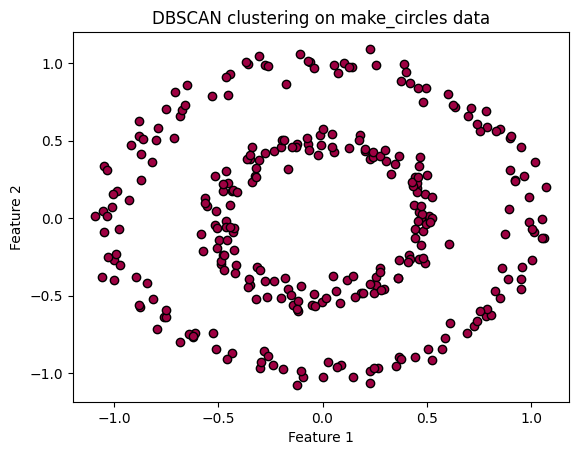

In [ ]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

y_dbscan = dbscan.labels_

unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (y_dbscan == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("DBSCAN clustering on make_circles data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# 26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
# centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

breast_cancer = load_breast_cancer()
X = breast_cancer.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


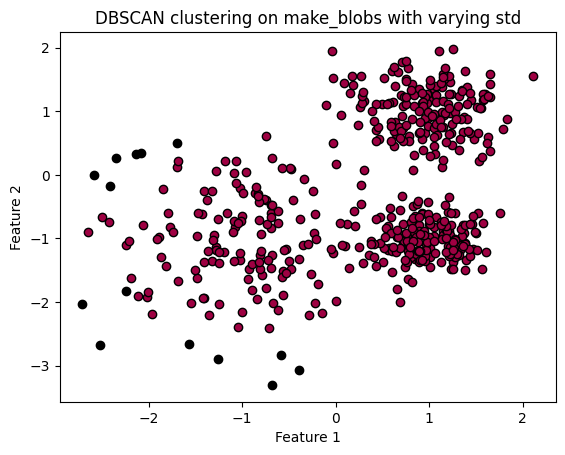

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

X, y = make_blobs(
    n_samples=500,
    centers=[[1, 1], [-1, -1], [1, -1]],
    cluster_std=[0.4, 0.8, 0.3],
    random_state=170,
)

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X)
y_dbscan = dbscan.labels_

unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (y_dbscan == k)

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("DBSCAN clustering on make_blobs with varying std")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

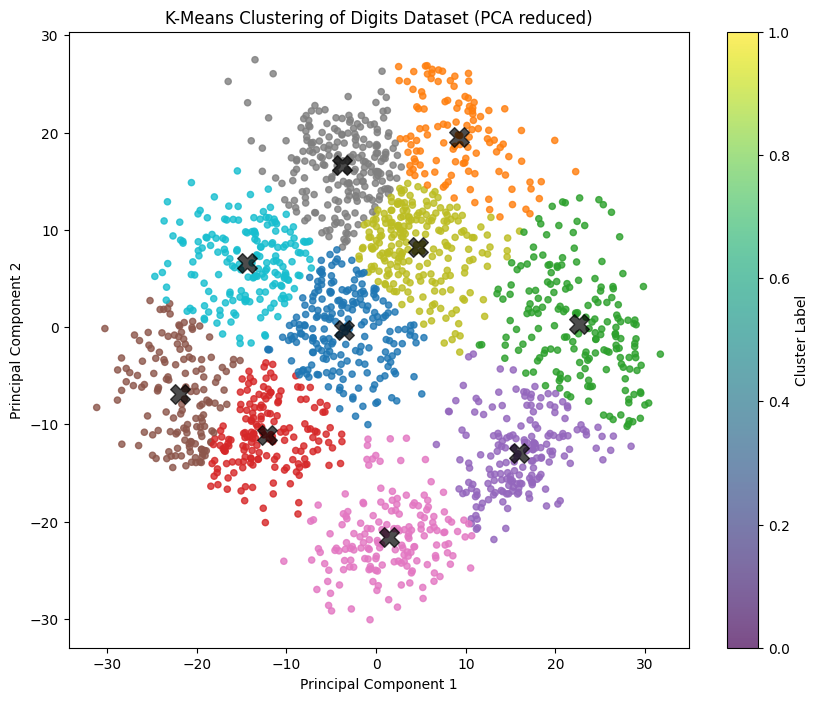

In [ ]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='tab10', s=20, alpha=0.8)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X')
plt.title('K-Means Clustering of Digits Dataset (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

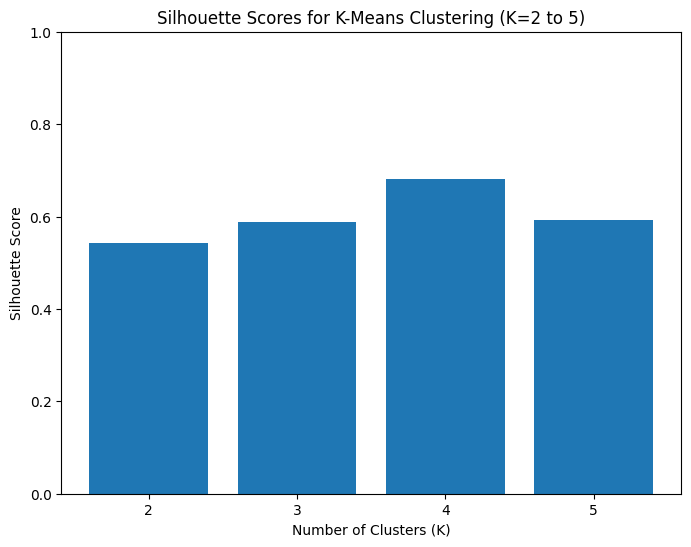

In [ ]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering (K=2 to 5)')
plt.xticks(k_values)
plt.ylim(0, 1)
plt.show()

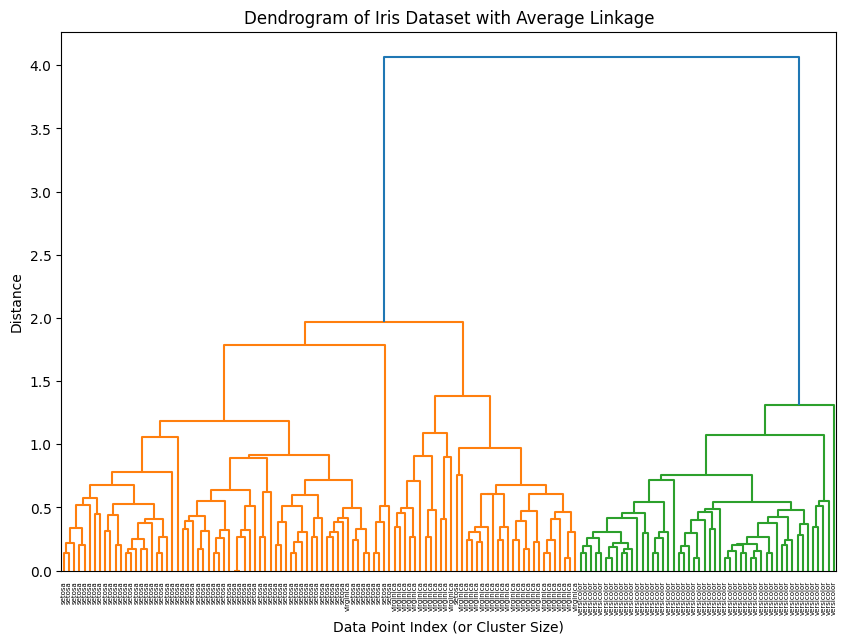

In [ ]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

linked = linkage(X, 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=iris.target_names[agg_clustering.labels_], # Use labels from previous agglomerative clustering if needed
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram of Iris Dataset with Average Linkage')
plt.xlabel('Data Point Index (or Cluster Size)')
plt.ylabel('Distance')
plt.show()


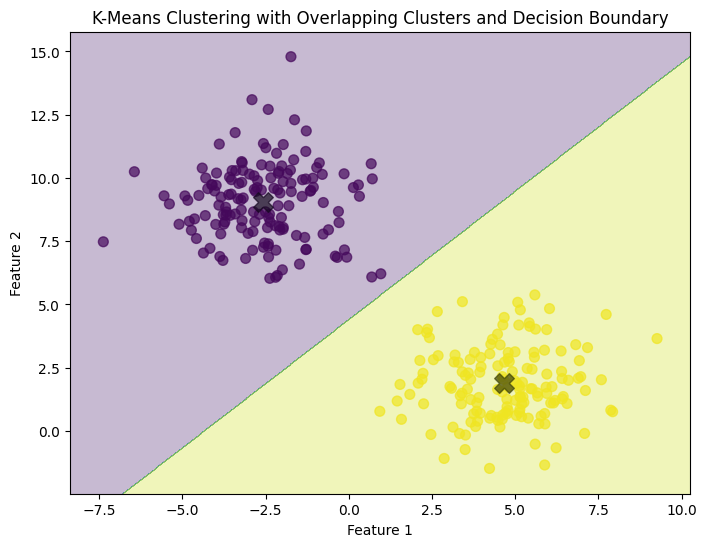

In [ ]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
# decision boundaries

import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

plt.title('K-Means Clustering with Overlapping Clusters and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

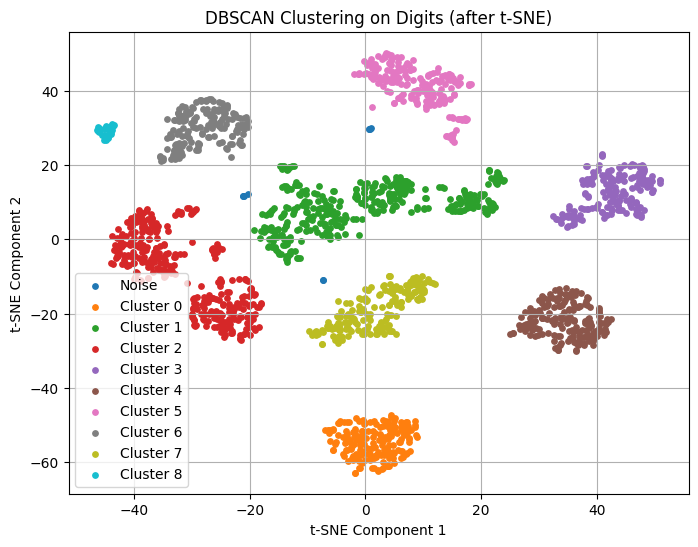

In [1]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)

# Step 4: Visualize results
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(clusters)

for cluster in unique_clusters:
    idx = clusters == cluster
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=f'Cluster {cluster}' if cluster != -1 else 'Noise', s=15)

plt.title("DBSCAN Clustering on Digits (after t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


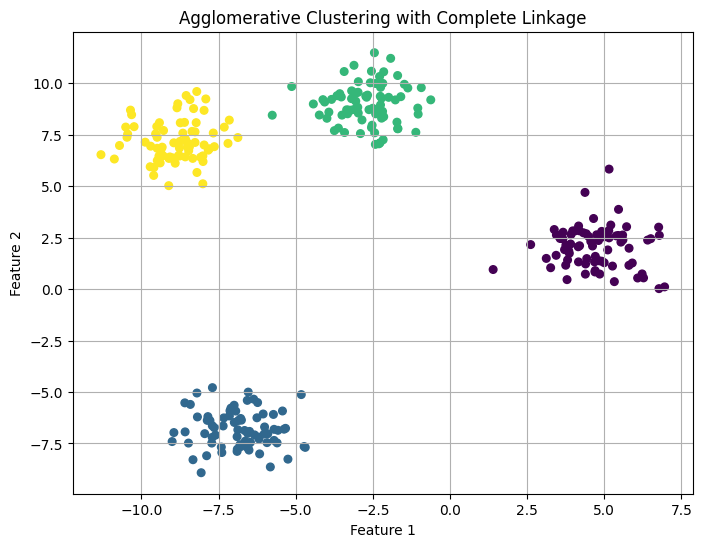

In [2]:

# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
# the result
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
y_pred = agglo.fit_predict(X)

# Step 3: Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


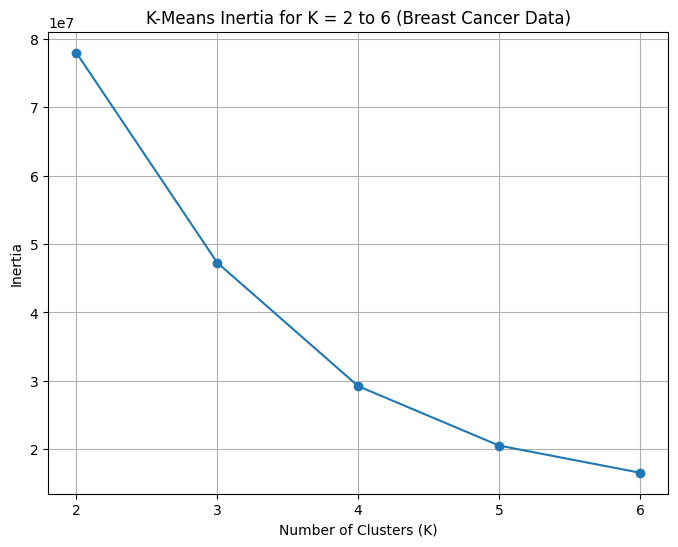

In [3]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
# line plot
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Apply K-Means for K = 2 to 6 and store inertia values
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Step 3: Plot K vs Inertia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.title("K-Means Inertia for K = 2 to 6 (Breast Cancer Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_values)
plt.show()


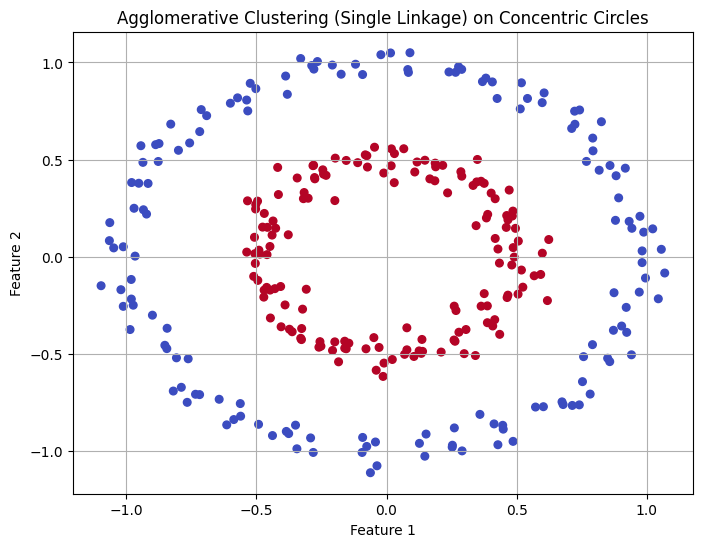

In [4]:

# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
# single linkage

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Generate concentric circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
y_pred = agglo.fit_predict(X)

# Step 3: Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [5]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
# noise
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise, i.e., label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


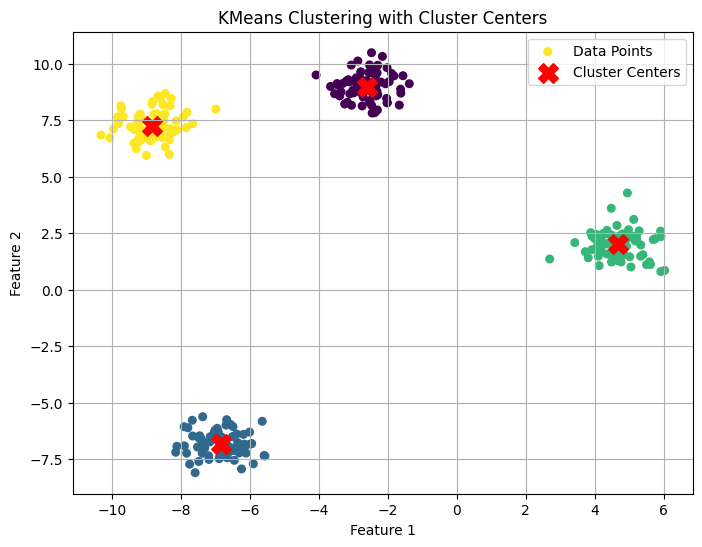

In [6]:
# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
# data points

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



In [7]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Iris dataset
data = load_iris()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count and print number of noise samples
n_noise = np.sum(labels == -1)
print("Number of noise samples:", n_noise)


Number of noise samples: 26


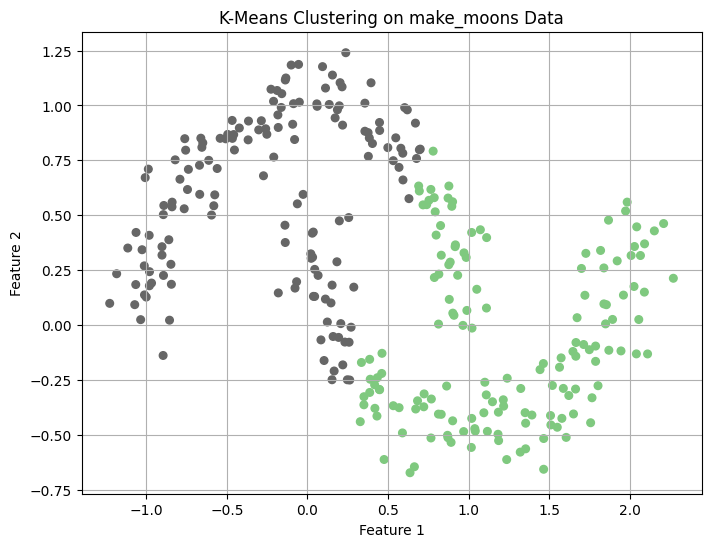

In [8]:

# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
# clustering result

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate non-linearly separable data
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Visualize clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='Accent', s=30)
plt.title("K-Means Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


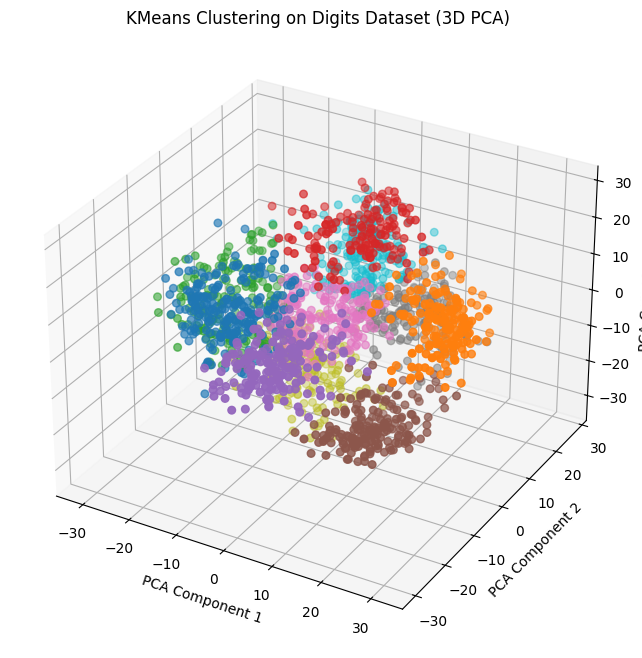

In [9]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
# scatter plot.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Step 4: Visualize with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=30)

ax.set_title("KMeans Clustering on Digits Dataset (3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()



In [10]:

# 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
# clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Step 3: Compute silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score for KMeans with 5 clusters:", score)


Silhouette Score for KMeans with 5 clusters: 0.7993257411585863


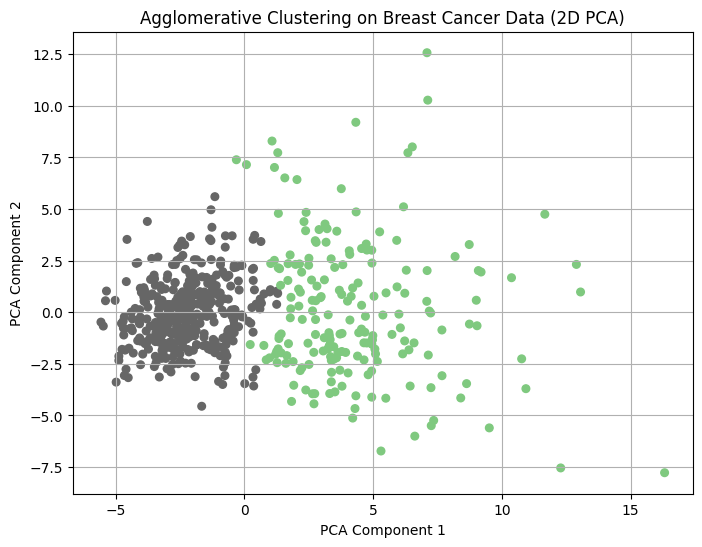

In [11]:

# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
# Visualize in 2D

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Step 5: Visualize in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Accent', s=30)
plt.title("Agglomerative Clustering on Breast Cancer Data (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()



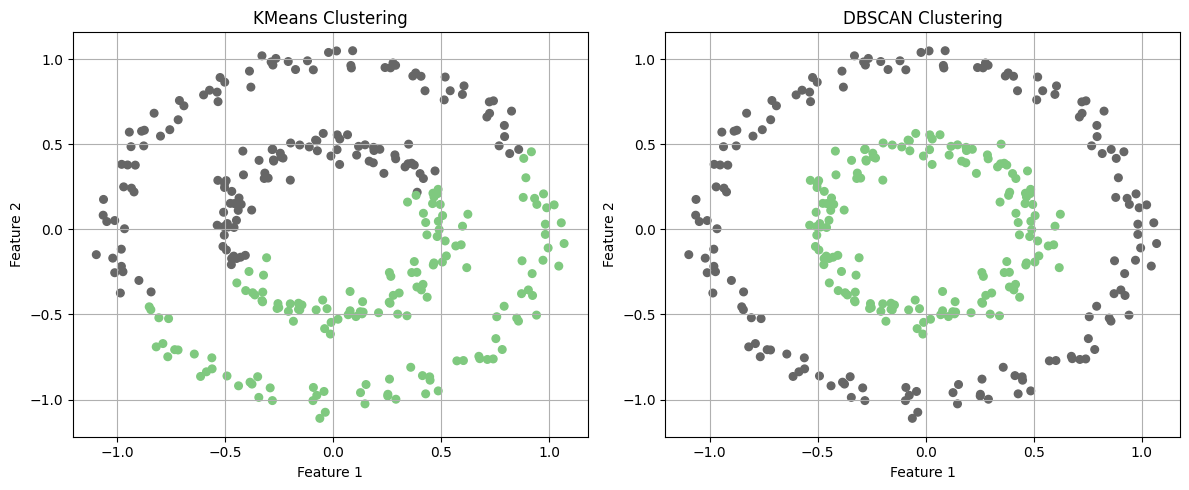

In [12]:
# 43.  Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
# side-by-side

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Step 1: Generate noisy circular data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Visualize side-by-side
plt.figure(figsize=(12, 5))

# KMeans Plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Accent', s=30)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# DBSCAN Plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Accent', s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()



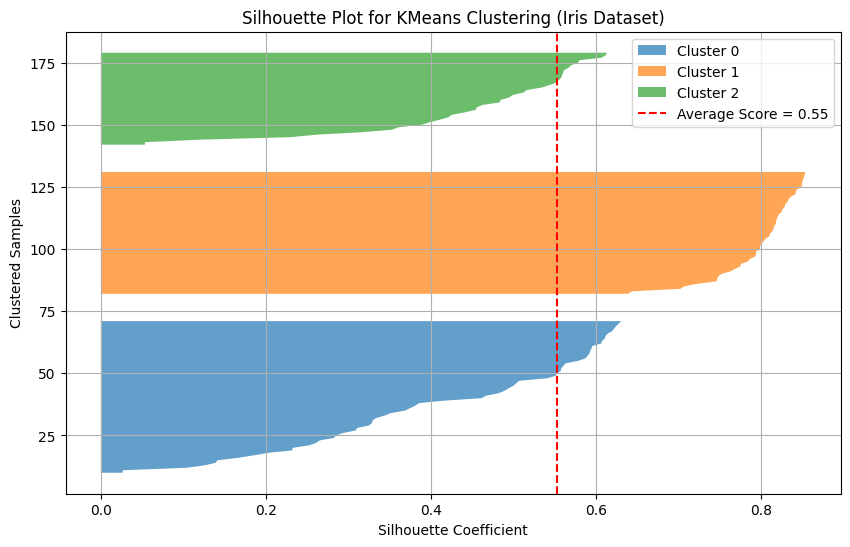

In [13]:
# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Iris dataset
data = load_iris()
X = data.data

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Step 3: Compute Silhouette Coefficients for each sample
silhouette_vals = silhouette_samples(X, labels)

# Step 4: Plot silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10  # space between clusters

# Draw average silhouette score
avg_score = silhouette_score(X, labels)
plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Score = {avg_score:.2f}")

plt.title("Silhouette Plot for KMeans Clustering (Iris Dataset)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Clustered Samples")
plt.legend()
plt.grid(True)
plt.show()


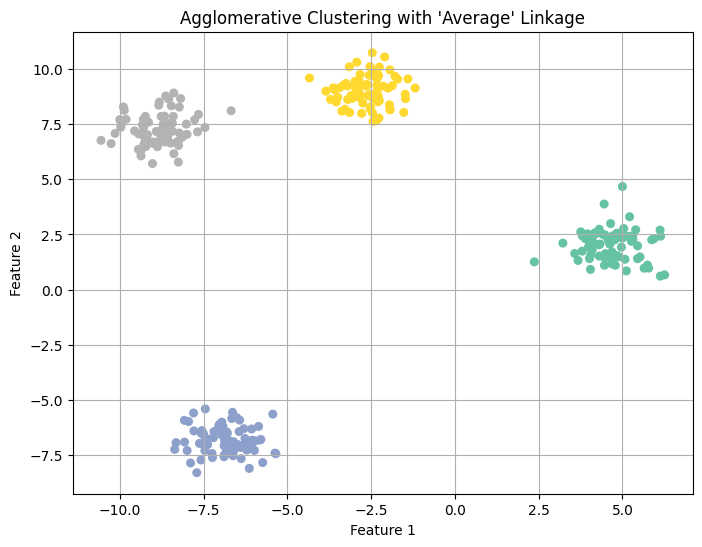

In [14]:

# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
# Visualize clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Step 2: Apply Agglomerative Clustering with average linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=30)
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


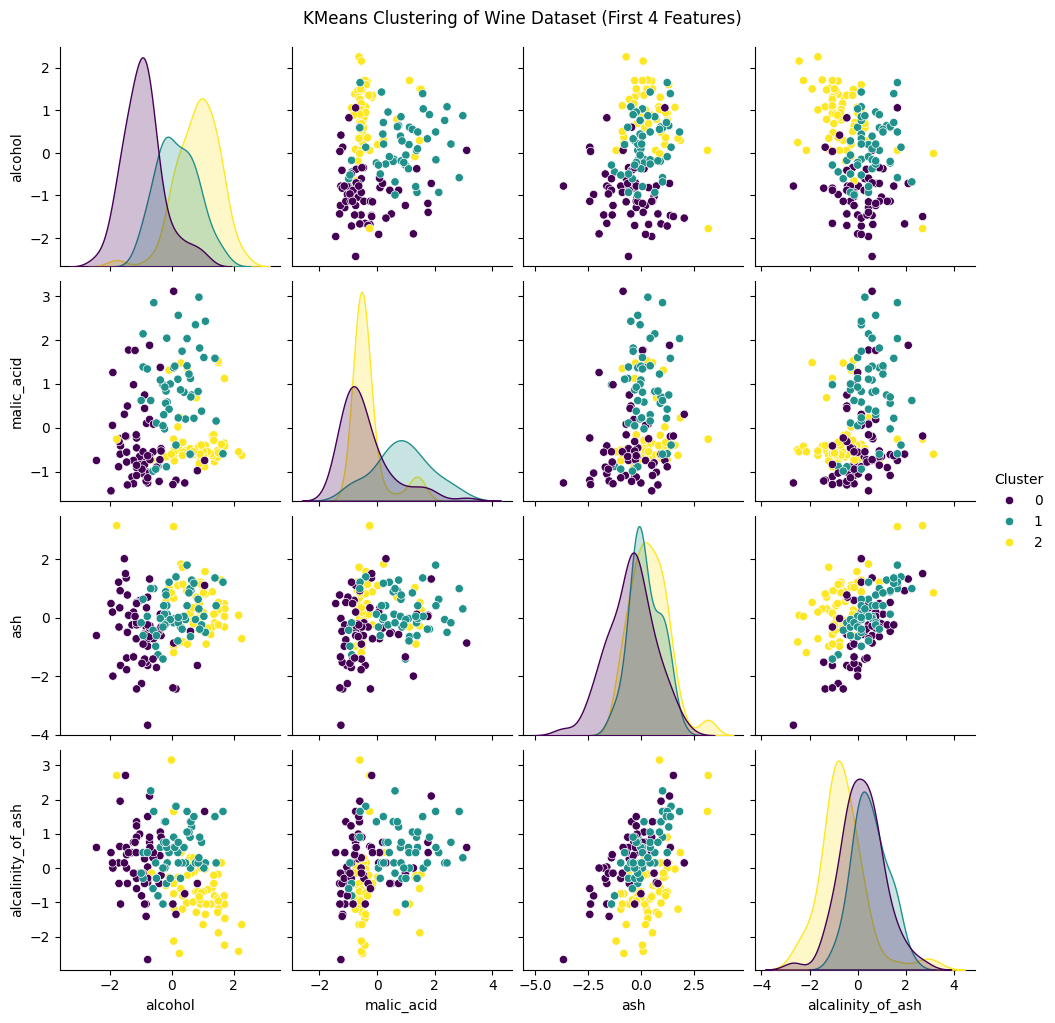

In [15]:
#46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
# features)

import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

import pandas as pd
wine_df = pd.DataFrame(X_scaled, columns=wine.feature_names)
wine_df['Cluster'] = y_kmeans
wine_df['True Label'] = y

sns.pairplot(wine_df, hue='Cluster', vars=wine_df.columns[:4], palette='viridis', diag_kind='kde')
plt.suptitle('KMeans Clustering of Wine Dataset (First 4 Features)', y=1.02)
plt.show()

Number of points identified as noise: 1


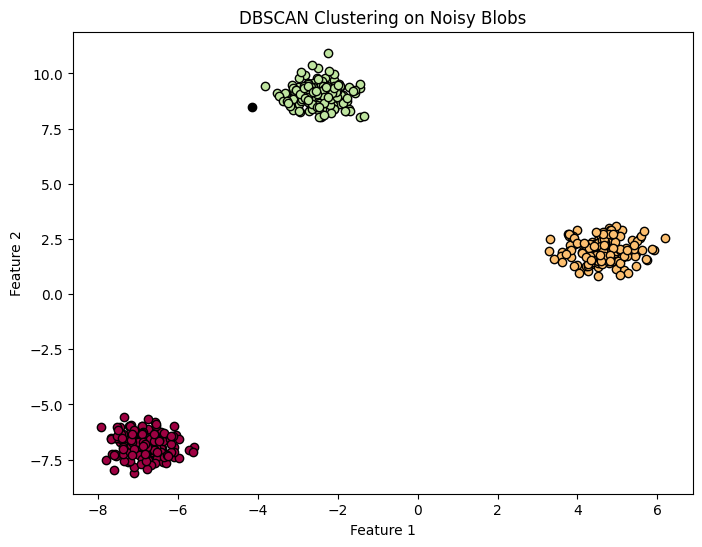

In [16]:
# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
# count

import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.5, random_state=42)


dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(X)

labels = dbscan.labels_

n_noise_ = list(labels).count(-1)

print(f"Number of points identified as noise: {n_noise_}")

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering on Noisy Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


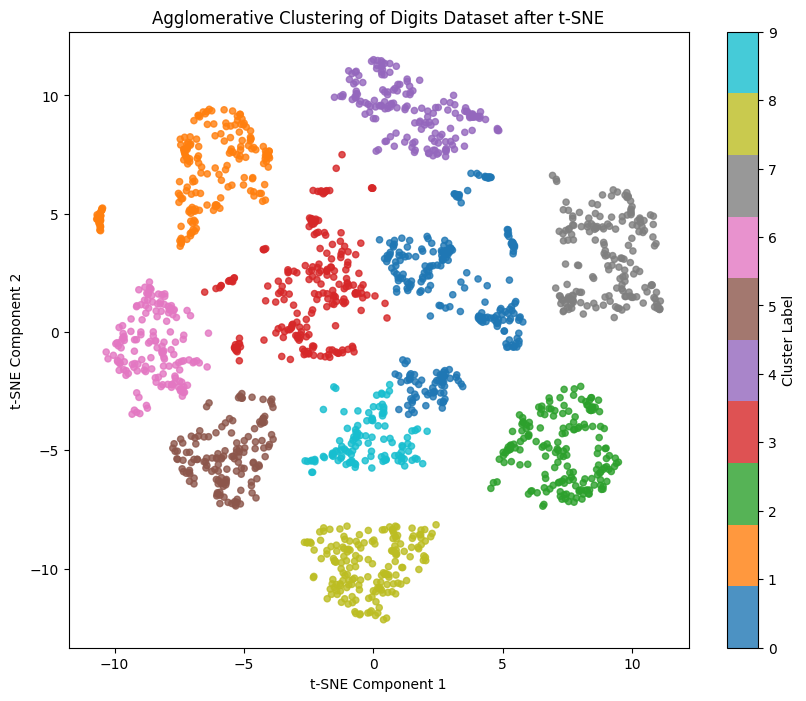

In [17]:

import matplotlib.pyplot as plt
# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
# clusters.

digits = load_digits()
X = digits.data
y = digits.target

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', n_iter=300)
X_tsne = tsne.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=10)
y_agg = agg_clustering.fit_predict(X_tsne)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_agg, s=20, cmap='tab10', alpha=0.8)
plt.title('Agglomerative Clustering of Digits Dataset after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()